Data & Package Load

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

Training_Data_Path = "https://raw.githubusercontent.com/NumanESchulich/SchulichDataScience/main/Data%20Science%20I%20(MBAN%206110T)/Group%20Assignment/Datasets/Train%20Dataset%20(Clustered%20%2B%20Feature%20Engineering%20%2B%20SMOTEENN).csv"
Testing_Data_Path = "https://raw.githubusercontent.com/NumanESchulich/SchulichDataScience/main/Data%20Science%20I%20(MBAN%206110T)/Group%20Assignment/Datasets/Untouched%20Test%20Data.csv"

# Read the train data file
df = pd.read_csv(Training_Data_Path)
test_df = pd.read_csv(Testing_Data_Path)



Chi-Square Test

In [2]:
# Selecting relevant columns for the ChiSquare test
relevant_columns = df.columns.drop(['ID', 'Diabetes_binary'])

# Performing ChiSquare test for each column
chi2_results = {}
for column in relevant_columns:
    contingency_table = pd.crosstab(df[column], df['Diabetes_binary'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results[column] = {'chi2': chi2, 'p-value': p}

# Sorting the results by chi2 value
chi2_results_sorted = pd.DataFrame(chi2_results).T.sort_values(by='chi2', ascending=False)

# Displaying the sorted results
chi2_results_sorted

,chi2,p-value
PhysicalCondition,92089.220561,1.062163e-122
LackOfDisease,80808.650041,0.000000e+00
GenHlth,77403.395543,8.301916e-232
Income,63666.865784,1.000000e+00
BMI,62450.613724,1.256976e-11
Age,60481.270467,2.672064e-08
NoHighBP,59367.616335,0.000000e+00
Lifestyle,50214.844518,1.000000e+00
NoHighChol,42311.306944,0.000000e+00
PhysHlth,32988.537211,1.000000e+00


Modelling

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define features and target for training data
X_train = df[['PhysicalCondition', 'LackOfDisease', 'Age', 'BMI']]
y_train = df['Diabetes_binary']

# Define features and target for testing data
X_test = test_df[['PhysicalCondition', 'LackOfDisease', 'Age', 'BMI']]
y_test = test_df['Diabetes_binary']

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    # Evaluate the model
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("\n" + "-"*60 + "\n")

Model: Logistic Regression
Accuracy: 0.5853831598864712
              precision    recall  f1-score   support

           0       0.96      0.54      0.69     43667
           1       0.23      0.87      0.37      7069

    accuracy                           0.59     50736
   macro avg       0.60      0.71      0.53     50736
weighted avg       0.86      0.59      0.65     50736


------------------------------------------------------------

Model: Random Forest
Accuracy: 0.8086959949542731
              precision    recall  f1-score   support

           0       0.92      0.85      0.88     43667
           1       0.37      0.53      0.44      7069

    accuracy                           0.81     50736
   macro avg       0.64      0.69      0.66     50736
weighted avg       0.84      0.81      0.82     50736


------------------------------------------------------------

Model: Gradient Boosting
Accuracy: 0.7790523494165879
              precision    recall  f1-score   support

     

Hyperparameter Tuning

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(class_weight='balanced')

# Initialize Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit Grid Search
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_rf.predict(X_test_scaled)

# Evaluate the model
print("Selected Model: Random Forest Classifier")
print(f"Best Parameters: {best_params}")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Selected Model: Random Forest Classifier
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.8420648060548723
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     43667
           1       0.42      0.36      0.39      7069

    accuracy                           0.84     50736
   macro avg       0.66      0.64      0.65     50736
weighted avg       0.83      0.84      0.84     50736



Random Forest Classifier - with SMOTE & Feature Engineering

In [5]:
# Select the specific columns for training
X_train = df[['PhysicalCondition', 'LackOfDisease', 'Age', 'BMI', 'Income']]
y_train = df['Diabetes_binary']  

# Select the specific columns for testing
X_test = test_df[['PhysicalCondition', 'LackOfDisease', 'Age', 'BMI', 'Income']]
y_test = test_df['Diabetes_binary']  

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(class_weight='balanced')

# Initialize Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit Grid Search
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_rf.predict(X_test_scaled)

# Evaluate the model
print("Selected Model: Random Forest Classifier")
print(f"Best Parameters: {best_params}")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Selected Model: Random Forest Classifier
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.8342399873856827
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     43667
           1       0.41      0.41      0.41      7069

    accuracy                           0.83     50736
   macro avg       0.65      0.65      0.65     50736
weighted avg       0.83      0.83      0.83     50736



Random Forest Classifier - with SMOTE & ALL RAW COLUMNS

In [6]:

# Select the specific columns for training
X_train = df[['CholCheck', 'BMI', 'PhysActivity', 'Fruits', 'Veggies', 'AnyHealthcare', 'NoDocbcCost', 
    'GenHlth', 'MentHlth', 'PhysHlth', 'Sex', 'Age', 'Education', 'Income', 
    'NoDiffWalk', 'NoHighBP', 'NoHighChol', 'NoHeartDiseaseorAttack', 'NoStroke', 
    'NoSmoker', 'NoHvyAlcoholConsump']]
y_train = df['Diabetes_binary']  

# Select the specific columns for testing
X_test = test_df[['CholCheck', 'BMI', 'PhysActivity', 'Fruits', 'Veggies', 'AnyHealthcare', 'NoDocbcCost', 
    'GenHlth', 'MentHlth', 'PhysHlth', 'Sex', 'Age', 'Education', 'Income', 
    'NoDiffWalk', 'NoHighBP', 'NoHighChol', 'NoHeartDiseaseorAttack', 'NoStroke', 
    'NoSmoker', 'NoHvyAlcoholConsump']]
y_test = test_df['Diabetes_binary']  

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(class_weight='balanced')

# Initialize Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit Grid Search
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_rf.predict(X_test_scaled)

# Evaluate the model
print("Selected Model: Random Forest Classifier")
print(f"Best Parameters: {best_params}")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Selected Model: Random Forest Classifier
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.8172500788394829
              precision    recall  f1-score   support

           0       0.92      0.87      0.89     43667
           1       0.38      0.52      0.44      7069

    accuracy                           0.82     50736
   macro avg       0.65      0.69      0.67     50736
weighted avg       0.84      0.82      0.83     50736



Random Forest Classifier - with RAW DATA & ALL RAW COLUMNS

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
url = 'https://raw.githubusercontent.com/NumanESchulich/SchulichDataScience/main/Data%20Science%20I%20(MBAN%206110T)/Group%20Assignment/Datasets/Full%20Dataset%20(RAW).csv'
df = pd.read_csv(url)

# Define the target variable and features based on the actual column names
features = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 
            'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 
            'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
target = 'Diabetes_binary'

# Split the dataset into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(class_weight='balanced')

# Initialize Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit Grid Search
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_rf.predict(X_test_scaled)

# Evaluate the model
print("Selected Model: Random Forest Classifier")
print(f"Best Parameters: {best_params}")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Selected Model: Random Forest Classifier
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.8572414064963734
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     43739
           1       0.45      0.15      0.23      6997

    accuracy                           0.86     50736
   macro avg       0.66      0.56      0.58     50736
weighted avg       0.82      0.86      0.83     50736



All Models Run on SMOTE Data

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Paths to the training and testing data
Training_Data_Path = "https://raw.githubusercontent.com/NumanESchulich/SchulichDataScience/main/Data%20Science%20I%20(MBAN%206110T)/Group%20Assignment/Datasets/Train%20Dataset%20(Clustered%20%2B%20Feature%20Engineering%20%2B%20SMOTEENN).csv"
Testing_Data_Path = "https://raw.githubusercontent.com/NumanESchulich/SchulichDataScience/main/Data%20Science%20I%20(MBAN%206110T)/Group%20Assignment/Datasets/Untouched%20Test%20Data.csv"

# Read the train and test data files
df = pd.read_csv(Training_Data_Path)
test_df = pd.read_csv(Testing_Data_Path)

# Assuming df and test_df are your dataframes
df['NotOverweight'] = df['BMI'].apply(lambda x: 0 if x >= 25 else 1)
test_df['NotOverweight'] = test_df['BMI'].apply(lambda x: 0 if x >= 25 else 1)

# Select the specific columns for training
X_train = df[['PhysicalCondition', 'LackOfDisease', 'Age', 'Income', 'NotOverweight']]
y_train = df['Diabetes_binary']

# Select the specific columns for testing
X_test = test_df[['PhysicalCondition', 'LackOfDisease', 'Age', 'Income', 'NotOverweight']]
y_test = test_df['Diabetes_binary']

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grids for Grid Search
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize models
models = {
    'Logistic Regression': (LogisticRegression(class_weight='balanced', max_iter=10000), param_grid_lr),
    'Naive Bayes': (GaussianNB(), {}),
    'Linear Discriminant Analysis': (LinearDiscriminantAnalysis(), {}),
    'K-nearest Neighbors': (KNeighborsClassifier(), param_grid_knn),
    'Random Forest': (RandomForestClassifier(), param_grid_rf),
    'Gradient Boosted Trees': (GradientBoostingClassifier(), param_grid_gb)
}

# Initialize lists to store results
model_names = []
best_params_list = []
accuracy_list = []

# Train and evaluate each model
for model_name, (model, param_grid) in models.items():
    print(f"Training {model_name}...")
    if param_grid:
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
        grid_search.fit(X_train_scaled, y_train)
        best_params = grid_search.best_params_
        best_model = grid_search.best_estimator_
    else:
        model.fit(X_train_scaled, y_train)
        best_params = "Default parameters"
        best_model = model
    
    y_pred = best_model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    model_names.append(model_name)
    best_params_list.append(best_params)
    accuracy_list.append(accuracy)
    
    print(f"Selected Model: {model_name}")
    print(f"Best Parameters: {best_params}")
    print("Accuracy:", accuracy)
    print(report)
    
# Create summary table
summary_df = pd.DataFrame({
    'Model': model_names,
    'Best Parameters': best_params_list,
    'Accuracy': accuracy_list
})

Training Logistic Regression...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Selected Model: Logistic Regression
Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.7010209713024282
              precision    recall  f1-score   support

           0       0.94      0.70      0.80     43667
           1       0.28      0.72      0.40      7069

    accuracy                           0.70     50736
   macro avg       0.61      0.71      0.60     50736
weighted avg       0.85      0.70      0.75     50736

Training Naive Bayes...
Selected Model: Naive Bayes
Best Parameters: Default parameters
Accuracy: 0.6264585304320404
              precision    recall  f1-score   support

           0       0.95      0.60      0.73     43667
           1       0.25      0.82      0.38      7069

    accuracy                           0.63     50736
   macro avg       0.60      0.71      0.56     50736
weighted avg       0.85      0.63      0.68     50736

Train

XGBoost (Run on GPU)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200}
Accuracy: 0.7041942604856513
              precision    recall  f1-score   support

           0       0.94      0.70      0.80     43667
           1       0.28      0.73      0.41      7069

    accuracy                           0.70     50736
   macro avg       0.61      0.71      0.60     50736
weighted avg       0.85      0.70      0.75     50736

   Accuracy                                    Best Parameters
0  0.704194  {'learning_rate': 0.01, 'max_depth': 4, 'n_est...


c:\Users\Numan\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:23:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


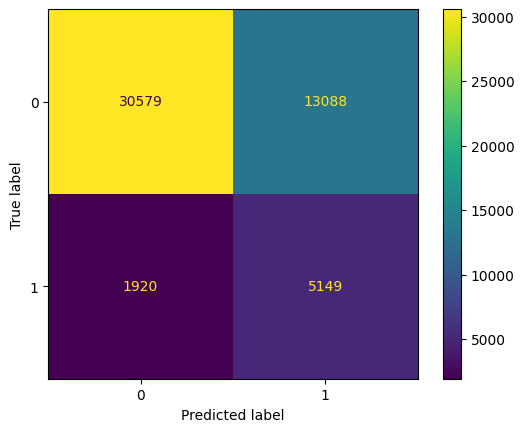

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Paths to the training and testing data
Training_Data_Path = "https://raw.githubusercontent.com/NumanESchulich/SchulichDataScience/main/Data%20Science%20I%20(MBAN%206110T)/Group%20Assignment/Datasets/Train%20Dataset%20(Clustered%20%2B%20Feature%20Engineering%20%2B%20SMOTEENN).csv"
Testing_Data_Path = "https://raw.githubusercontent.com/NumanESchulich/SchulichDataScience/main/Data%20Science%20I%20(MBAN%206110T)/Group%20Assignment/Datasets/Untouched%20Test%20Data.csv"

# Read the train and test data files
df = pd.read_csv(Training_Data_Path)
test_df = pd.read_csv(Testing_Data_Path)

# Feature engineering
df['NotOverweight'] = df['BMI'].apply(lambda x: 0 if x >= 25 else 1)
test_df['NotOverweight'] = test_df['BMI'].apply(lambda x: 0 if x >= 25 else 1)

# Select the specific columns for training
X_train = df[['PhysicalCondition', 'LackOfDisease', 'Age', 'Income', 'NotOverweight']]
y_train = df['Diabetes_binary']

# Select the specific columns for testing
X_test = test_df[['PhysicalCondition', 'LackOfDisease', 'Age', 'Income', 'NotOverweight']]
y_test = test_df['Diabetes_binary']

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for Grid Search
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4]
}

# Initialize and train XGBoost with GPU support
xgb_model = XGBClassifier(eval_metric='logloss', tree_method='hist', device='cuda')
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=3, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train_scaled, y_train)

# Get the best model and parameters
best_xgb_model = grid_search_xgb.best_estimator_
best_params = grid_search_xgb.best_params_

# Make predictions and evaluate
y_pred = best_xgb_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Best Parameters: {best_params}")
print("Accuracy:", accuracy)
print(report)

# Display summary table using pandas
summary_df = pd.DataFrame({'Accuracy': [accuracy], 'Best Parameters': [str(best_params)]})
print(summary_df)

# Display confusion matrix
ConfusionMatrixDisplay.from_estimator(best_xgb_model, X_test_scaled, y_test)
plt.show()